In [2]:
#[1] 패키지를 불러오기
import keras
from keras import layers   #각 계층을 만드는 모듈
from keras import models   #각 계층을 연결하여 신경망 모델을 만든 후, 컴파일하고 학습시키는 모듈
                           #compile(), fit(), predict(), evaluate() 등 딥러닝 처리 함수 대부분을 제공함
from keras import backend  #딥러닝 엔진을 직접 제어할 수 있는 모듈 제공 
                           #(많은 기능을 제공하는 케라스 이용시 그리 많이 사용되지는 않음)

Using TensorFlow backend.


In [3]:
#[2] 필요한 파라미터 설정
#후반의 main()에서 설정
#Nin 입력계층 노드 수, Nh 은닉계층 수, number_of_class 출력값이 가질 클래스 수, Nout 출력 노드 수

In [4]:
#[3] 모델 구현
#models.Sequential로 상속하여 연쇄 방식으로 모델을 구현 가능함, class형식(객체)으로
#C의 재귀함수처럼 자기자신 모델을 연쇄적으로 사용
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        #super()는 기본 특성을 상속한 부모 함수임, 이 부모 객체의 초기화 함수를 먼저 부름
        super().__init__()  

        self.add(layers.Conv2D(32, kernel_size=(3, 3),                #kernel_size=filter size 
                 activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())                                    #이미지->벡터
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))     #출력계층

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])

In [5]:
#[4] 데이터 불러오기
#Mnist 필기 숫자 데이터셋 
from keras import datasets 

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [6]:
#[5] 학습 결과 분석을 위한 그래프 구현

import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['accuracy'])         #train
    plt.plot(history['val_accuracy'])     #test
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)  #두 선의 이름(Train, Test) 표시    

def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history    
    plt.plot(history['loss'])          #학습 데이터로 구한 손실값
    plt.plot(history['val_loss'])      #검증 데이터로 구한 손실값
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)

11493376/11490434 [==============================] - 2s 0us/step
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 262us/step - loss: 0.2354 - accuracy: 0.9296 - val_loss: 0.0658 - val_accuracy: 0.9806
Epoch 2/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.0870 - accuracy: 0.9753 - val_loss: 0.0508 - val_accuracy: 0.9852
Epoch 3/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.0671 - accuracy: 0.9805 - val_loss: 0.0476 - val_accuracy: 0.9867
Epoch 4/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.0549 - accuracy: 0.9836 - val_loss: 0.0429 - val_accuracy: 0.9886
Epoch 5/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.0490 - accuracy: 0.9860 - val_loss: 0.0424 - val_accuracy: 0.9882
Epoch 6/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.0454 - accuracy: 0.9862 - val_loss: 0.0386 - val_accuracy: 0.9

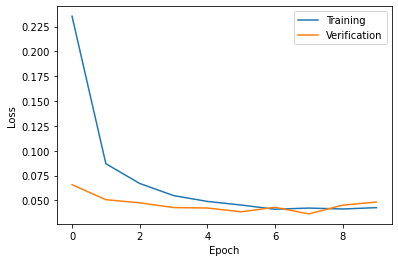

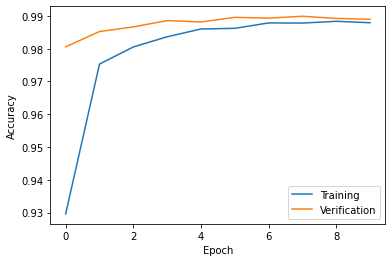

In [7]:
#[6] 학습 및 성능 분석
def main():
    batch_size = 128
    epochs = 10

    data = DATA()
    model = CNN(data.input_shape, data.num_classes)

    history = model.fit(data.x_train, data.y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.2)       #8:2=train:test

    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()

if __name__ == '__main__':
    main()

In [ ]:
#train epoch 2부터는 완만, test도 loss 비슷하게
#epoch 1정도에서 성능 확 좋아짐, test 정확도도 상당히 높음
#GPU설정 후 시간 113s->7s로 감소